In [1]:
import pandas as pd
import torch
from torch import nn
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import matplotlib.pyplot as plt
from d2l import torch as d2l

In [2]:
excel_path = './1.xlsx'
data = pd.read_excel(excel_path)
data

,X,X2,Y
0,-561,463,-1075.238150
1,-766,-686,-1486.941761
2,-2,935,25.561988
3,-285,913,-512.430260
4,194,712,424.538556
...,...,...,...
912,928,930,1910.053004
913,60,524,184.764627
914,640,720,1358.404397
915,367,887,748.358786


In [3]:
# 进行标准化
features = data.columns
data[features] = data[features].apply(lambda x: (x - x.mean())/x.std())
data

,X,X2,Y
0,-0.949964,-0.143678,-0.956662
1,-1.296074,-2.864551,-1.304017
2,-0.006183,0.974035,-0.027915
3,-0.483983,0.921938,-0.481820
4,0.324732,0.445963,0.308702
...,...,...,...
912,1.563973,0.962195,1.562032
913,0.098494,0.000772,0.106404
914,1.077731,0.464907,1.096606
915,0.616815,0.860369,0.581909


In [4]:
device = d2l.try_gpu()
X = torch.tensor((data['X']), dtype=torch.float32, device=device)
X2 = torch.tensor((data['X2']), dtype=torch.float32, device=device)
Y = torch.tensor(data['Y'], dtype=torch.float32, device=device)
# net = nn.Sequential(nn.Linear())
[t[:10] for t in (X, X2, Y)]

[tensor([-0.9500, -1.2961, -0.0062, -0.4840,  0.3247, -1.6472,  0.1475, -1.0107,
          0.5172, -0.3050], device='cuda:0'),
 tensor([-0.1437, -2.8646,  0.9740,  0.9219,  0.4460, -2.1612,  0.0813, -1.2945,
          0.1784,  0.1973], device='cuda:0'),
 tensor([-0.9567, -1.3040, -0.0279, -0.4818,  0.3087, -1.6793,  0.1324, -0.9713,
          0.5333, -0.2787], device='cuda:0')]

In [5]:
X = torch.cat((X.unsqueeze(1), X2.unsqueeze(1)), 1)

In [6]:
Y = Y.unsqueeze(1)

In [7]:
X.shape, Y.shape

(torch.Size([917, 2]), torch.Size([917, 1]))

In [8]:
num_hiddens = 256
net = nn.Sequential(nn.Linear(X.shape[1], num_hiddens), nn.ReLU(),
                   nn.Linear(num_hiddens, 1))
net = net.to(device)

In [9]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
loss = nn.MSELoss()

In [10]:
num_epochs = 20
for epoh in range(num_epochs):
    optimizer.zero_grad()
    l = loss(net(X), Y)
    l.sum().backward()
    optimizer.step()
    print(f'epoch: {epoh} loss: {l}')

epoch: 0 loss: 1.5820088386535645
epoch: 1 loss: 0.5571433901786804
epoch: 2 loss: 0.26413771510124207
epoch: 3 loss: 0.15787138044834137
epoch: 4 loss: 0.1105872392654419
epoch: 5 loss: 0.084320567548275
epoch: 6 loss: 0.06688709557056427
epoch: 7 loss: 0.054060447961091995
epoch: 8 loss: 0.04415633901953697
epoch: 9 loss: 0.036350373178720474
epoch: 10 loss: 0.03014494478702545
epoch: 11 loss: 0.025192642584443092
epoch: 12 loss: 0.021231815218925476
epoch: 13 loss: 0.01805877313017845
epoch: 14 loss: 0.015512736514210701
epoch: 15 loss: 0.013466138392686844
epoch: 16 loss: 0.011817553080618382
epoch: 17 loss: 0.010486274026334286
epoch: 18 loss: 0.009408057667315006
epoch: 19 loss: 0.008531762287020683


In [11]:
torch.save(net.state_dict(), 'linear_model.params')

In [12]:
test_X = torch.randn((30, 2), device=device) + 10
test_X[:10]

tensor([[10.4673,  9.9575],
        [ 8.9302, 10.7883],
        [10.1586, 10.3671],
        [ 9.9816, 10.6398],
        [ 9.4420, 11.4105],
        [10.1687, 10.7729],
        [ 9.2914,  9.7375],
        [11.1346, 10.0341],
        [ 9.4917, 10.1754],
        [ 9.4869, 10.1888]], device='cuda:0')

In [13]:
test_Y = net(test_X)

In [14]:
test_data = pd.DataFrame(columns=['X1', 'X2', 'Y'])
test_data['X1'] = test_X[:, 0].to('cpu').detach().numpy()
test_data['X2'] = test_X[:, 1].to('cpu').detach().numpy()
test_data['Y'] = test_Y.to('cpu').detach().numpy()
test_data[:10]

,X1,X2,Y
0,10.467271,9.957463,7.761021
1,8.930247,10.788275,6.901815
2,10.158595,10.367094,7.611139
3,9.981553,10.639771,7.522140
4,9.442006,11.410488,7.272474
5,10.168675,10.772909,7.647848
6,9.291363,9.737516,7.020576
7,11.134564,10.034095,8.160399
8,9.491737,10.175425,7.183087
9,9.486907,10.188770,7.181641


In [15]:
test_data.to_excel('1_副本.xlsx', index=None)

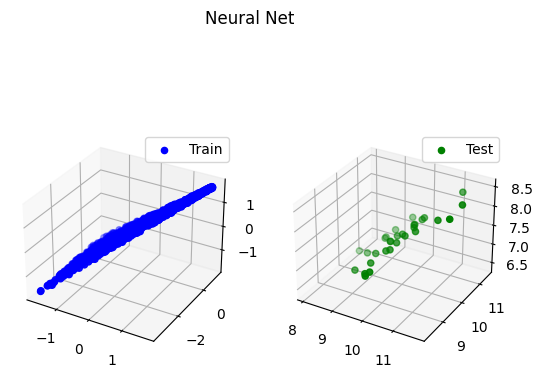

In [16]:
fig = plt.figure()
ax = fig.add_subplot(121,projection='3d')
ax.scatter(*[data[col] for col in data.columns], c='b', label='Train')
ax.legend()

ax = fig.add_subplot(122,projection='3d')
ax.scatter(*[test_data[col] for col in test_data.columns], c='g', label='Test')
ax.legend()

fig.subplots_adjust(wspace=0.2)
fig.suptitle('Neural Net')

plt.show()